# E-learning For Web And Mobile Developers - Finding The Best Markets To Advertise In

## Introduction
---
A company in the e-learning business that specializes in mobile and web development wants to know what are the two best markets to promote their recently created programming course, soon to be made available to the public. The company's product is based on a monthly subscription priced at $59.   

To produce a quick landscape of the e-leaning we make use of data provided by the free e-learning platform [freeCodeCamp](https://www.freecodecamp.org/). This organization compiled and made public the results of a [survey](https://www.freecodecamp.org/news/take-the-2017-new-coder-survey-and-help-us-build-a-massive-public-dataset-8c808cbee7eb/) they undertook in 2017, which delivers a good profiling on people who have been learning in several fields of IT in the past five years. The survey results are publicly available at their [GitHub](https://github.com/freeCodeCamp/2017-new-coder-survey) archive. This survey is a good resource that provides a general demographic and social characterization of the type of individual that might be interested in purchasing new e-learning content. Some of the profile categories include:


 - Demographics: age, respondent's nationality, gender, city of residence, etc.
 
 
 - Social/economic:
     - Social condition: marital status, has children, etc.
     - Employment status: employed, income, debt, etc. <p>
     
     
 - IT related: experience in coding, field of expertize, resources used to learn new content, money spent in learning content, etc.

## Exploring The Data Set
---

In [1]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# To avoid 'DtypeWarning: Columns (17, 16)' insert this dict into `pd.read_csv()`.
dtype_dic = {
    'CodeEventOther': 'str',
    'JobInterestOther': 'str'
}

survey = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv', dtype=dtype_dic)

Basic information on `survey`.


\[Note: due to the extensive number of columns in `survey`, the full information summary on this data set has been relegated to Annex I, at the end of the project.\]

In [3]:
survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18175 entries, 0 to 18174
Columns: 136 entries, Age to YouTubeTheNewBoston
dtypes: float64(105), object(31)
memory usage: 18.9+ MB


As an example let's observe the first respondent's answer to the survey (missing values dropped):

In [4]:
survey.iloc[0, :].dropna()

Age                                                          27.0
AttendedBootcamp                                              0.0
CityPopulation                                more than 1 million
CommuteTime                                      15 to 29 minutes
CountryCitizen                                             Canada
CountryLive                                                Canada
EmploymentField                       software development and IT
EmploymentStatus                               Employed for wages
Gender                                                     female
HasDebt                                                       1.0
HasFinancialDependents                                        0.0
HasHighSpdInternet                                            1.0
HasHomeMortgage                                               0.0
HasServedInMilitary                                           0.0
HasStudentDebt                                                0.0
HoursLearn

### Formulating The Main Scope Of The Analysis

The two basic questions are:

- Where to advertise?
- To whom does the content provider should target its advertisement?

For a quicker approach to the analysis the focus will be initially based on a macro view of the potential markets, to assess which countries possess the greatest growing potential, instead of looking on a micro level, e.g. assessing which partners/platforms the company could consider to advertise in. Focusing on the macro level, we can try to quantify the market dimensions through the dynamics between the willingness to pay of e-learners and the price of the product to be offered by the company we represent. 

### What Is The Weight Of E-learners Wanting To Be Either Web Or Mobile Developers?

The upcoming course is mainly target to web and mobile developers,  therefore it is necessary to understand whether the survey we're exploring is actually representative of our population of interest.

The following DataFrame, `desired_job`, compiles the frequency distribution (in percentage) of the values in `JobRoleInterest`, a column where respondents are asked to nominate the job roles within the programming/coding field they are interested in applying for.   

In [5]:
desired_job_count = survey['JobRoleInterest'].value_counts().sort_values(ascending=False)

count_perc = (
    survey['JobRoleInterest'].value_counts(normalize=True)
    .sort_values(ascending=False)*100
)

desired_job = pd.DataFrame(
    {
        'Desired Job Role': desired_job_count.index,
        'Count Answers': desired_job_count,
        'Percentage (%)': count_perc,
    },
)

desired_job.index = range(0, len(desired_job_count.index))

na_desired_job = survey['JobRoleInterest'].isna().sum()

print(f'Desired jobs, answers: {desired_job["Count Answers"].sum()}')

print(f'Percentage from total answers in survey: {round(na_desired_job*100/survey.shape[0], 2)}%.')

Desired jobs, answers: 6992
Percentage from total answers in survey: 61.53%.


As we can see above, only 61.53% of the respondents answered the job role question. 

`desired_job.info()` reports that 3213 unique answers were given in the `Desired Job Role` column/question (equivalent to `JobRoleInterest`); this is a consequence of allowing the respondent to fill a unconstrained number of desired job roles. Because we're trying to narrow the profile of our target consumer, the data set will imply some data cleaning and reconfiguration. Let's proceed with the analysis of the summary analysis of `desired_job`.

In [6]:
desired_job.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3213 entries, 0 to 3212
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Desired Job Role  3213 non-null   object 
 1   Count Answers     3213 non-null   int64  
 2   Percentage (%)    3213 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 75.4+ KB


Top 10 most replied answer on desired job roles:

In [7]:
desired_job.iloc[:10]

,Desired Job Role,Count Answers,Percentage (%)
0,Full-Stack Web Developer,823,11.770595
1,Front-End Web Developer,450,6.435927
2,Data Scientist,152,2.173913
3,Back-End Web Developer,142,2.030892
4,Mobile Developer,117,1.673341
5,Game Developer,114,1.630435
6,Information Security,92,1.315789
7,"Full-Stack Web Developer, Front-End Web Deve...",64,0.915332
8,"Front-End Web Developer, Full-Stack Web Deve...",56,0.800915
9,Product Manager,55,0.786613


Given the multitude of job role interests, and combinations, the number of unique answers is so high, to the point that the ten most answered job roles only comprise of approx. 30% of the total number of unique answers (3213).

In [8]:
print(f'Sum of top 10 most answered job role frequencies: {desired_job["Percentage (%)"].iloc[:10].sum().round(2)}%')

Sum of top 10 most answered job role frequencies: 29.53%


Desired job roles answers that include either the expression 'Web Developer' or 'Mobile Developer' in the description:

In [9]:
web_or_mobile = desired_job['Desired Job Role'].str.contains(
    '(?:Web Developer|Mobile Developer)', regex=True
    )

web_mobile = desired_job[web_or_mobile]

web_mobile_perc = round((web_mobile.shape[0]*100/desired_job.shape[0]), 2)

print(f'Desired web or mobile job role unique answers: {web_mobile.shape[0]}')
print(f'Percentage from total unique job role answers: {web_mobile_perc}%')
print(f'Percentage from total answers in survey: {web_mobile["Percentage (%)"].sum().round(2)}%')

Desired web or mobile job role unique answers: 2918
Percentage from total unique job role answers: 90.82%
Percentage from total answers in survey: 86.24%


Looking more closely to the top 10 desired job roles, we can see that most of the jobs contain the expression 'Web Developer' while 'Mobile Developer' appears as the fifth most popular desired job role. Furthermore, we also know that 86.24% of the respondents that answered to the job role question report interest in web or mobile development, which assures us that the data in hand is, at least partially, adequate to the type of exploration we desire to undertake - mind that 38.47% of the respondents did not answer this question. Figure 1 below, summarizes these findings. 

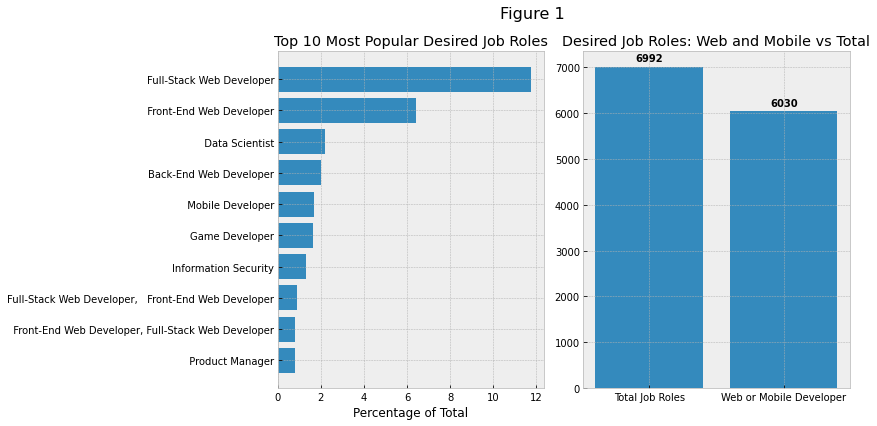

In [10]:
top10 = desired_job.head(10)

fig = plt.figure(figsize=(12, 6))

plt.style.use('bmh')


fig.suptitle('Figure 1', fontsize=16, x=0.62)

# Subplots.
ax1 = plt.subplot(1, 2, 1)
ax2 = plt.subplot(1, 2, 2)


# Horizontal bar plot.
ax1.set_title('Top 10 Most Popular Desired Job Roles')

ax1.barh(y=top10['Desired Job Role'],
         width=top10['Percentage (%)'])

ax1.invert_yaxis()  # descending order

ax1.set_xlabel('Percentage of Total')


# Vertical bar plot.
ax2.set_title('Desired Job Roles: Web and Mobile vs Total')

# X axis labels.
ax2_bar_labels = ['Total Job Roles', 'Web or Mobile Developer']

graph_2 = ax2.bar(x=[0, 1],
                  height=[desired_job['Count Answers'].sum(), web_mobile['Count Answers'].sum()],
                  tick_label=ax2_bar_labels)


# Top of the bars label values.
ax2_bar_values = [desired_job['Count Answers'].sum(), web_mobile['Count Answers'].sum()]

i = 0
for bar in graph_2:
    width = bar.get_width()
    height = bar.get_height()
    x, y = bar.get_xy()
    plt.text(x+width/2,
             y+height*1.02,
             ax2_bar_values[i],
             ha='center',
             weight='bold')
    i += 1


plt.tight_layout()

plt.show()

### Refining The Data Set And Quantifying The Number Of Respondents By Country Of Residence

`survey_2` excludes rows without a response (`NaN`) in the `JobRoleInterest` column. This will narrow down the sample to respondents that clearly pursuit e-learning as an investment towards finding a job role in the IT sector, more specifically in either web or mobile development. We can assume this way that this group of respondents is willing to actively search in the market for e-learning content.

In [11]:
# Removing rows where `JobRoleInterest` has missing values.  
jobrole_not_null = survey['JobRoleInterest'].notnull()

survey_2 = survey[jobrole_not_null]

Grouping respondents by country of residence:

In [12]:
country_res_freq_abs = (
    survey_2['CountryLive']
    .value_counts()
    .sort_values(ascending=False)
)

country_res_freq_rel = (
    survey_2['CountryLive']
    .value_counts(normalize=True)
    .sort_values(ascending=False)
    .round(3)*100
)

Frequency distribution by country, of the answers in the survey, after filtering.

In [13]:
country_res_freq_table = pd.DataFrame(
    {
        'Absolute': country_res_freq_abs,
        'Relative (%)': country_res_freq_rel
    }
)

country_res_freq_table.head(10)

,Absolute,Relative (%)
United States of America,3125,45.7
India,528,7.7
United Kingdom,315,4.6
Canada,260,3.8
Poland,131,1.9
Brazil,129,1.9
Germany,125,1.8
Australia,112,1.6
Russia,102,1.5
Ukraine,89,1.3


Number of countries represented in the 2017 survey:

In [14]:
country_res_freq_table.shape[0]

137

`country_res_freq_table` groups the respondents by country of residence. As we can see, the large majority of respondents lives in the US (45.7%), while the rest of the countries, 136 of them, account for the other half of the respondents' residency. The middle ground is formed by India, U.K. and Canada, where approx. 7.7, 4.6, and 3.8 percent of the respondents live in, respectively. All other countries below Canada have a very small representation, with each one being less than 2% of the whole. Given this picture, it may be more interesting to compare the aforementioned top 4 countries/markets, in order to understand which similarities and differences may differentiate them as better or worst markets to advertise in.

## Assessing The Willingness To Pay Of E-learners 
---

The survey provided by _freeDataCamp_ is very comprehensive, and can give many clues on how to profile the target consumer. It provides essential information, such as:
 - Money spent on learning content (`MoneyForLearning`). 
 - Months spent learning (`MonthsProgramming`).
 - Events and bootcamps attended.
 - Digital platforms, resources, and specialized media (podcasts, blogs, etc.) consumed.
 
 
For now we'll be focusing on some data cleaning and data transformation, that can give us a term of comparison between the monthly cost of our company's product and how much are e-learners currently spending on a monthly basis:
- Some respondents answered that they were learning at `0` months; to avoid later on division errors, we'll assume that learning under a month is equivalent to be learning 'up to one month' (`1`).


- Build a ratio -`learn_monthly_expend`, that informs of how much each student spends per month on learning (hereby, also designated in short as 'monthly expenditure').


- We'll be trimming the data set again, excluding the rows/answers which miss the value on `learn_monthly_expend`.

Note that we're using the term of willingness to pay because we are focusing on what respondents are actually spending in e-learning at the time of the survey, which may differ from their purchasing power. Although the purchasing power of a respondent can affect the willingness to pay for a given product, it doesn't mean that a high purchasing power individual cannot have a low willingness to pay for a given product, and vice-versa.

In [15]:
# Suppressing `SettingWithCopyWarning`.
pd.options.mode.chained_assignment = None  # default='warn'

survey_2['MonthsProgramming'] = survey_2['MonthsProgramming'].replace(0, 1)

survey_2['learn_monthly_expend'] = survey_2['MoneyForLearning'] / survey_2['MonthsProgramming']

survey_3 = survey_2[survey_2['learn_monthly_expend'].notnull()]

### Analyzing The Average Monthly Learning Expenditure By Country, Focusing On US, India, The United Kingdom And Canada

Compiling the mean, median and modes for the top four countries/markets:

In [16]:
usa = survey_3[survey_3['CountryLive'] == 'United States of America'].copy(0)
india = survey_3[survey_3['CountryLive'] == 'India'].copy(0)
uk = survey_3[survey_3['CountryLive'] == 'United Kingdom'].copy(0)
canada = survey_3[survey_3['CountryLive'] == 'Canada'].copy(0)


usa_expend = usa['learn_monthly_expend']
india_expend = india['learn_monthly_expend']
uk_expend = uk['learn_monthly_expend']
canada_expend = canada['learn_monthly_expend']


country_ = (
    pd.DataFrame(
        {
            'USA':usa_expend.describe(),
            'India':india_expend.describe(), 
            'UK':uk_expend.describe(), 
            'Canada':canada_expend.describe()
        }
    )
    .round(2)
)

country_

,USA,India,UK,Canada
count,2933.00,463.00,279.00,240.00
mean,228.00,135.10,45.53,113.51
std,1940.25,692.96,162.31,441.01
min,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00
50%,3.33,0.00,0.00,0.00
75%,50.00,13.25,20.42,25.00
max,80000.00,10000.00,1400.00,5000.00


`country_expend_descrip` shows the average monthly learning  expenditure in USD, by country. We can see that there are great discrepancies of magnitude between the mean, the median and the mode (the mode for every country in the panel is `$0`; these are described in the Annex I - 'Monthly Learning Expenditures (2017): mode(s)'). The means are too high if contrasted with the medians, i.e. 50% of all values, are `$0` or close to it. Also, the maximum values for the monthly expenditure in both cases, is suspiciously high; we can see that the difference between the maximum value and the upper percentile (75%), in all cases, is disproportionately high. This discrepancy may indicate that there are outliers that are inflating the mean. We can assume that outliers, in this particular case, are very high monthly expenditures, which may be derived from a mistake/typo in the answer, or maybe, there are e-learning products out there, with prices substantially higher to those practiced by the majority of the e-learning platforms mentioned in the survey. This might be the case of university courses/degrees and bootcamps. 

### Boxplot Analysis Of Monthy Expenditures

Given that the average monthly expenditures are completely uneven, we must decide realistically, what is the consumer target. Provided that most of the high expenditure outliers are correct and are not a typo in the answer, we must observe closely the distribution of values, and then decide whether to and how to remove the extreme outliers.

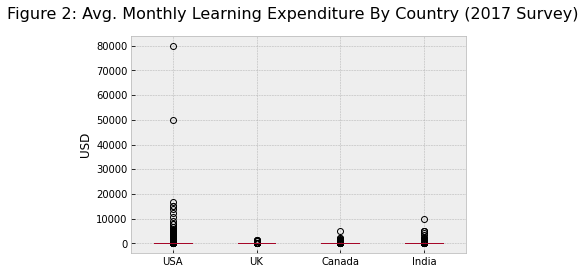

In [17]:
fig, ax = plt.subplots()

plt.style.use('bmh')

fig.suptitle('Figure 2: Avg. Monthly Learning Expenditure By Country (2017 Survey)', fontsize=16)

ax.boxplot(
    [usa_expend, uk_expend, canada_expend, india_expend],
    labels=['USA', 'UK', 'Canada', 'India']
)


ax.set_ylabel('USD')


plt.show()

Based on the boxplots displayed above (Figure 2) we can acknowledge the presence of upper outliers as the boxplots themselves are 'squashed down' near the minimum value, which is `$0`. 


In order to trim those upper outliers, four possible criteria come to mind:

- assess the outliers visually and determine a threshold.


- remove the top 1% monthly expenditures or other justified percentage.


- remove values over the top whisker, which is calculated resorting to the inter-quartile range (IQR):

\begin{align}
IQR = upper_{quartile} - lower_{quartile} \\
\text{Upper Box Plot Whisker} = upper_{quartile} + IQR*1.5 \\
outlier > \text{Upper Box Plot Whisker} 
\end{align}
    
- compute the Z-score of each value for each Series, and trim the values above 2 or 3 standard-errors. 


The main idea at this stage is to identify a target group of potential subscribers, but what constitutes a potential subscriber may be difficult to assess by simply using one of the criteria stated above, without any justification behind it. On that matter, one can ask whether high spenders constitute part of the potential market, or in other words, is it fair to assume that someone that is spending for example, \\$500+ per month, will be interested in the type of course that costs \\$59 per month. One can justify the decision to exclude students in the sub-category of high spending, arguing that perhaps they are more interested in acquiring a more traditional school diploma from an established institution, or perhaps they participated in expensive but short-term learning events. e.g. bootcamps, and aren't so much interested in a monthly subscription based product. Obviously, this justification is conservative and subject to legit criticism, and it is also likely to lead to different conclusions, if the series were trimmed used one of the criteria listed above. In order to trim the extreme outliers, let's instead, exclude all monthly expenditures over 5 times the current monthly subscription price of \\$59. This amounts to \\$295, which we round to \\$300 as our definitive threshold.

In [18]:
# Applying the threshold as a condition to remove the upper ouliers.
usa_expend_trimmed = usa_expend[usa_expend <= 300]
india_expend_trimmed = india_expend[india_expend <= 300]
uk_expend_trimmed = uk_expend[uk_expend <= 300]
canada_expend_trimmed = canada_expend[canada_expend <= 300]

`expend_dist_summary_2017` gives the panel of basic statistics for the monthly expenditure series, cleaned of values beyond \\$300.

In [19]:
expend_dist_summary_2017 = (
    pd.DataFrame(
        {
            'USA':usa_expend_trimmed.describe(),
            'India':india_expend_trimmed.describe(),
            'UK':uk_expend_trimmed.describe(),
            'Canada':canada_expend_trimmed.describe()}
    )
    .round(2)
)

expend_dist_summary_2017

,USA,India,UK,Canada
count,2645.00,432.00,271.00,221.00
mean,25.83,17.96,21.84,19.66
std,53.01,45.36,47.13,49.57
min,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00
50%,0.42,0.00,0.00,0.00
75%,25.00,8.33,18.33,14.29
max,300.00,300.00,285.71,300.00


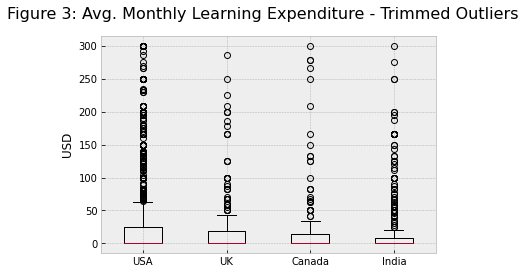

In [20]:
fig, ax = plt.subplots()

plt.style.use('bmh')


fig.suptitle(
    'Figure 3: Avg. Monthly Learning Expenditure - Trimmed Outliers',
    fontsize=16
)

ax.boxplot(
    [usa_expend_trimmed, uk_expend_trimmed, canada_expend_trimmed, india_expend_trimmed],
    labels=['USA', 'UK', 'Canada', 'India']
)


ax.set_ylabel('USD')


plt.show()

As we can see in the latest group of box plots (Figure 3), applying the outlier threshold will trim the data in a way that maximum values are now much closer the mean, even though very far away. We can now even visualize the inter-quartile range of each box plot. Based on the figure and the table displayed above - `expend_dist_summary_2017`, we gather evidence that the US is the best market to advertise in, having the highest number of high paying students of the panel, and the highest number of students overall. Regarding the other countries:

- the UK seems to surpass Canada as the second best market to advertise in, having a slightly higher average spending and a market composed of more students.


- India at this time, has substantially more potential subscribers than UK and Canada, but the average spending is slightly lower compared with these countries.

To conclude on this part of the analysis, USA and the UK seem to be the best markets to advertise in, given the restriction applied to the level of maximum expenditure observed in the original series.   

### Choosing The Markets To Invest Based On The Perceived Willingness To Pay Of Potential Costumers

How many students spend \\$59 or more in learning expenditures? And what if we consider students that spend less than \\$59 but can also be perceived as potential subscribers? Lets say that potential subscribers can also be included if they are already spending at least half of the proposed price, i.e. around \\$29 in monthly expenditures. Below we register both scenarios.

Notes: 

- By including potential buyers which are currently spending less than the proposed price of our product we are focused in understanding the market potential in terms of costumers; because we are not considering the offering of the product in two different price categories we don't focus the analysis in terms of profit: we expect that potential buyers can be interested in paying \\$59 even if they are currently spending less than that. 


- since the top of the expenditure series have already been trimmed out of values over \\$300, in practice we are counting values between ranging from \\$29 up to \\$300 and from \\$59 up to \\$300.

In [21]:
# For $59.
usa_over59_count = usa_expend_trimmed[usa_expend_trimmed >= 59].size
india_over59_count = india_expend_trimmed[india_expend_trimmed >= 59].size
uk_over59_count = uk_expend_trimmed[uk_expend_trimmed >= 59].size
canada_over59_count = canada_expend_trimmed[canada_expend_trimmed >= 59].size

over_equal59_2017 = (
    pd.Series(
        {
            'USA': usa_over59_count,
            'India': india_over59_count,
            'UK': uk_over59_count,
            'Canada': canada_over59_count,
        }
    )
    .sort_values(ascending=False)
)    


# For $29.
usa_over29_count = usa_expend_trimmed[usa_expend_trimmed >= 29].size
india_over29_count = india_expend_trimmed[india_expend_trimmed >= 29].size
uk_over29_count = uk_expend_trimmed[uk_expend_trimmed >= 29].size
canada_over29_count = canada_expend_trimmed[canada_expend_trimmed >= 29].size


over_equal29_2017 = (
    pd.Series(
        {
            'USA': usa_over29_count,
            'India': india_over29_count,
            'UK': uk_over29_count,
            'Canada': canada_over29_count,
        }
    )
    .sort_values(ascending=False)
)


pd.DataFrame({'$59': over_equal59_2017, '$29': over_equal29_2017}).sort_index()

,$59,$29
Canada,21,35
India,44,62
UK,35,55
USA,376,589


For both cases - `$59` and `$29`, USA appears as the market with more potential subscribers again. What is interesting to see is that India actually exceeds the UK and Canada in students that are already spending a value higher or equal to \\$59. Once again, this can be explained by the fact that India registered 432 students (after trimming) compared 271 and 221 of UK and Canada respectively. Given this new piece of information, the fight for the slot of second best market to advertise in appears blurred, and welcomes new data. A follow-up survey to the 2017 could give good hints on which of these markets is growing at a higher pace.  

### Some Questions And Answers Derived From The Analysis.
---

Should the company we represent invest in a second market, which one would it be?
 
- There are arguments in favor of either India, Canada or UK, although with a slight inclination for the former. More elements of analysis should be added so that a more precise/justified answer can be made.

---
 
Does it make sense to advertise in more than two countries?

- This question makes more sense when seen under the notion of market maturity. If we have data on multiple years it would be easier to arrive at an answer, based on the market growth of each country. The level of established competitors can also be an incentive to search for other markets; in the case of the US, one can expected that its more costly to gain market share than in new markets with high growing potential, such as the case of India. 

---
 
Does it make sense to split the advertising budget unequally (e.g.: spend 70% to advertise in the US and 30% to advertise in India)?

- It may depend on the costs of advertising (business/advertising permits, deals with third party platforms, etc.), but in principle, the market that offers a quicker ROI (return on investment) should weigh in more on the consigned budget.

---


Does it make sense to advertise only in the US?

- Given that these markets are expected to grow, it is important to invest and to be established in new markets from the beginning, as to gain a _[first-mover advantage](https://en.wikipedia.org/wiki/First-mover_advantage)_. Also, the aforementioned advertising costs in India can be potentially lower compared with the other western countries. 

---

If we had a marketing team in our company, would it be better to just send them our results and let them use their domain knowledge to take the best decision?

- In the case of having a marketing company it would be wise to coordinate the effort between teams, so that all the expertise could be channeled to reach more refined insights on the subject, and thus more informed decision making. 

## Conclusion Remarks Based On The Analysis Of The 2017 _freeCodeCamp_ Survey
---

The analysis shows that the US is the undeniable best choice to advertise in. The perception is that it has, by far, the highest number of potential costumers and also the highest number of potential costumers who are willing to pay more for e-learning services. If the advertising strategy envisions the exploration of other markets, both India and the UK present evidence in their favor, although it is unclear which market might have the highest return on investment, solely based on the information provided in this one survey. To further explore the issue, one possible strategy would be to reach out to the marketing team, asking them to define more precisely the target consumer, based on how much she/he spends on e-learning content, combined with other profile aspects, such as finding out what is the preferred approach to learning, e.g. students that indicate first preference for self-paced 'pay as you go' courses should be seen as the primary target, instead of students that are more interested in bootcamps or college enrolling.

## Further Exploration - Suggesting A Second Best Market To Invest In
---
With the support of more information - freeCodeCamp's 2016 and 2018 surveys, lets make a quick comparison between potential secondary markets to advertise in, based on the framework used so far.

### The 2016 And 2018 Data Sets

In [22]:
# `survey_2016` also raises a warning about mixed types in the 
# columns below, therefore we specify the type manually.
# slight name change compared with 2017's survey ('JobInterestOther').
dtype_dic_2016 = {
    'CodeEventOther': 'str',
    'JobRoleInterestOther': 'str'
}  

survey_2016 = pd.read_csv('2016-FCC-New-Coders-Survey-Data.csv', dtype=dtype_dic_2016)
survey_2018 = pd.read_csv('2018-fCC-New-Coders-Survey-Data.csv')

# copying 2017's survey into a new identifier.
survey_2017 = survey.copy()

Basic info on the 2016 and 2018 data sets:

- Note: full list of columns' names in the Annex I. 

In [23]:
survey_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15620 entries, 0 to 15619
Columns: 113 entries, Age to StudentDebtOwe
dtypes: float64(85), object(28)
memory usage: 13.5+ MB


In [24]:
survey_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28397 entries, 0 to 28396
Columns: 137 entries, ID to time_total_sec
dtypes: float64(106), int64(3), object(28)
memory usage: 29.7+ MB


The first task is to repeat the filtering of both data sets in order to include only students which desire to be either a web or a mobile developer. Contrary to 2016 and 2017 versions, the 2018 survey does not have the column 'JobRoleInterest' but has for each working field, within the job role possibilities, binary columns ('1' if interested, else '0'). To filter out the 2018 data set, we include only rows which have the value `1` in at least one of the columns below:

- `job_intr_fllstck` (Full Stack)
- `job_intr_backend` (Back End)
- `job_intr_frntend` (Front End)
- `job_intr_mobile`  (Mobile)
- `job_intr_devops`  (DevOps / SysAdmin)   
- `job_intr_datasci` (Data Science)  
- `job_intr_teacher` (Teacher / Trainer / Developer Evangelist)
- `job_intr_qa_engn` (Quality Assurance Engineer)  
- `job_intr_ux_engn` (User Experience Designer)  
- `job_intr_projm`   (Project Management)  
- `job_intr_gamedev` (Game Development) 
- `job_intr_infosec` (Information Security)   
- `job_intr_dataengn`(Data Engineer)
- `job_intr_other`   (other job)


#### Removing rows without answered desired job role(s) 

**2016**

In [25]:
jobrole_not_null_2016 = survey_2016['JobRoleInterest'].notnull()

survey_2016_2 = survey_2016[jobrole_not_null_2016]

**2017**

(Already done in the previous analysis; copying the 2017 DataFrame into a new identifier)

In [26]:
survey_2017_2 = survey_2.copy()

**2018**

In [27]:
jobrole_not_null_2018_cond = survey_2018.loc[:, 'job_intr_fllstck':'job_intr_other'].notnull()

jobrole_not_null_2018_any = jobrole_not_null_2018_cond.any(axis=1).rename('at_least_one_jobrole')

survey_2018 = survey_2018.join(jobrole_not_null_2018_any)

survey_2018_2 = survey_2018[survey_2018['at_least_one_jobrole']].reset_index(drop=True)

### The Absolute And Relative Frequency Distribution Of The Top 10 Countries With More Students

**2016**

In [28]:
country_res_freq_abs_2016 = survey_2016_2['CountryLive'].value_counts().sort_values(ascending=False)

country_res_freq_rel_2016 = (
    survey_2016_2['CountryLive']
    .value_counts(normalize=True)
    .sort_values(ascending=False)
    .round(3)*100
)

In [29]:
country_res_freq_table_2016 = pd.DataFrame(
    {
        'Absolute': country_res_freq_abs_2016,
        'Relative (%)': country_res_freq_rel_2016
    }
)

country_res_freq_table_2016.head(10)

,Absolute,Relative (%)
United States of America,2979,52.5
India,382,6.7
United Kingdom,242,4.3
Canada,221,3.9
Australia,122,2.2
Poland,105,1.9
Russia,98,1.7
Ukraine,96,1.7
Germany,80,1.4
Brazil,73,1.3


**2018**

In [30]:
# 'country_live' instead of 'CountryLive' in the 2018 data set.
country_res_freq_abs_2018 = (
    survey_2018_2['country_live']
    .value_counts()
    .sort_values(ascending=False)
)

country_res_freq_rel_2018 = (
    survey_2018_2['country_live']
    .value_counts(normalize=True)
    .sort_values(ascending=False)
    .round(3)*100
)


country_res_freq_table_2018 = pd.DataFrame(
    {
        'Absolute': country_res_freq_abs_2018,
        'Relative (%)': country_res_freq_rel_2018
    }
)

country_res_freq_table_2018.head(10)

,Absolute,Relative (%)
United States of America,5160,37.8
India,1916,14.0
United Kingdom,556,4.1
Canada,407,3.0
Nigeria,319,2.3
Brazil,282,2.1
Germany,260,1.9
Russia,249,1.8
Australia,184,1.3
Spain,170,1.2


From the frequency tables above for 2016 and 2018, we can see that the top 4 is identical for all three years (including 2017), thus we can compare the values side-by-side in order to have a better perspective of year-by-year changes.

### Which Markets Are Growing And How Do They Compare With The Evolution Of The Business Sector?

One of the advantages of having the same survey for several years is that we can compare directly the year-over-year changes in the variables. In this case, we are interested in knowing if the e-learning sector is growing as a whole and which markets may be the main drivers behind that growth. We assume that the number of respondents/answers which have at least one desired job role can be seen as a proxy to the e-learning market in the year each survey was taken.

In [31]:
# Copying 2017 results into new identifier.
country_res_freq_table_2017 = country_res_freq_table.copy()

countries = ['United States of America', 'India', 'United Kingdom', 'Canada']

top_4_by_country = pd.DataFrame(
    {
        '2016':country_res_freq_table_2016.loc[countries, 'Relative (%)'],
        '2017':country_res_freq_table_2017.loc[countries, 'Relative (%)'],
        '2018':country_res_freq_table_2018.loc[countries, 'Relative (%)']
    }
)

#### Comparing the frequency distribution among the the top 4 countries across three years. 

In [32]:
top_4_by_country

,2016,2017,2018
United States of America,52.5,45.7,37.8
India,6.7,7.7,14.0
United Kingdom,4.3,4.6,4.1
Canada,3.9,3.8,3.0


As we can see in the table above, India is consistently growing its share, while the other countries represent less of the global market in 2018, than in previous years.

#### Year-over-year percentage change in the number of respondents (with at least one desired job role), for the top 4 countries.

In [33]:
change_2016_17 = ((top_4_by_country['2017'] - top_4_by_country['2016']) / top_4_by_country['2016'])*100

change_2017_18 = ((top_4_by_country['2018'] - top_4_by_country['2017']) / top_4_by_country['2017'])*100

change_2016_17 = change_2016_17.rename('2016-2017').round(2)

change_2017_18 = change_2017_18.rename('2017-2018').round(2)

yearly_change = pd.concat([change_2016_17, change_2017_18], axis=1)


# Appending the YoY change in all countries to the df `yearly_change`.
change_2016_17_total = (
    (country_res_freq_table_2017['Absolute'].sum() - country_res_freq_table_2016['Absolute'].sum()) / country_res_freq_table_2016['Absolute'].sum()
                        )*100

change_2017_18_total = (
    (country_res_freq_table_2018['Absolute'].sum() - country_res_freq_table_2017['Absolute'].sum()) / country_res_freq_table_2017['Absolute'].sum()
                        )*100

change_2016_17_total = change_2016_17_total.round(2)

change_2017_18_total = change_2017_18_total.round(2)

changes_total_countries = pd.DataFrame(
    {
        '2016-2017':change_2016_17_total,
        '2017-2018':change_2017_18_total
    },
    index=['All countries']
)

yearly_change_top4 = pd.concat([yearly_change, changes_total_countries])

yearly_change_top4

,2016-2017,2017-2018
United States of America,-12.95,-17.29
India,14.93,81.82
United Kingdom,6.98,-10.87
Canada,-2.56,-21.05
All countries,20.62,99.81


Total number of respondents by year/survey:

In [34]:
number_respondents_total = [
    survey_2016.shape[0],
    survey_2017.shape[0],
    survey_2018.shape[0]
]

tot_respond_summary = pd.DataFrame(
    {
        '2016': number_respondents_total[0],
        '2017': number_respondents_total[1],
        '2018': number_respondents_total[2]
    }, 
    index=['No. Students']
)

tot_respond_summary

,2016,2017,2018
No. Students,15620,18175,28397


Year-over-year percentage change of total number of respondents:

In [35]:
change_total_respondents_2016_17 = round(
    ((survey_2017.shape[0] - survey_2016.shape[0]) / survey_2016.shape[0]) * 100, 2)

change_total_respondents_2017_18 = round(
    ((survey_2018.shape[0] - survey_2017.shape[0]) / survey_2017.shape[0]) * 100, 2)


yearly_change_survey = pd.DataFrame(
    {
        '2016-17': change_total_respondents_2016_17,
        '2017-18': change_total_respondents_2017_18
    }, 
    index=['YoY % change']
)

yearly_change_survey

,2016-17,2017-18
YoY % change,16.36,56.24


In general, when looking to the table that shows the year-over-year percentage change in the number of students in the top 4 most represented countries - `yearly_change_top4`, while the rest of the countries has less students responding to the survey, India grows its base substantially. For example, the number of respondents living in India increased by almost 82% from 2017 to 2018. This is an indication of a potential growing market, because we can also assess that, while the total number of respondents increased substantially over the years (check `yearly_change_survey` values), the sub-sample of respondents with at least one desired job role (our population of interest), also increased. The idea behind this reasoning is: more students answering the survey provides the perception that the market in the e-learning sector is growing in potential, and at the same time the Indian market seems to be growing at a higher rate, contributing more than the other countries to that global market growth.

### The Willingness To Pay Of An Average E-learner - Comparing The Years of 2017 and 2018

Since 2018 is the most recent data, we go over the process of computing the average monthly expenditure and compare it with the 2017 values, in order to assess whether the average student is spending more or less than before and which country has the highest number of students with the highest willingness to pay.

`learn_monthly_expend` gives out how much each student spends per month on e-learning; here by, also designated in short by 'monthly expenditure'.

In [36]:
# Support series: replace the '0's by '1's.
survey_2018_2['months_programming'] = survey_2018_2['months_programming'].replace(0, 1)

survey_2018_2['learn_monthly_expend'] = survey_2018_2['money_for_learning'] / survey_2018_2['months_programming']

New DataFrame `survey_2018_3`: excluding rows where `learn_monthly_expend` is null:

In [37]:
survey_2018_3 = survey_2018_2[survey_2018_2['learn_monthly_expend'].notnull()]

#### Comparing Expenditure Frequency Distributions By Country When Trimming Values Beyond \\$300 - 2017 Vs 2018 

In [38]:
# Isolating 2018 expenditures by country into Series.
usa_2018 = survey_2018_3.copy(0)[survey_2018_3['country_live'] == 'United States of America']
india_2018 = survey_2018_3.copy(0)[survey_2018_3['country_live'] == 'India']
uk_2018 = survey_2018_3.copy(0)[survey_2018_3['country_live'] == 'United Kingdom']
canada_2018 = survey_2018_3.copy(0)[survey_2018_3['country_live'] == 'Canada']


usa_expend_2018 = usa_2018['learn_monthly_expend']
india_expend_2018 = india_2018['learn_monthly_expend']
uk_expend_2018 = uk_2018['learn_monthly_expend']
canada_expend_2018 = canada_2018['learn_monthly_expend']


# Applying the thresholds as a condition to remove the upper ouliers.
usa_2018 = usa_expend_2018[usa_expend_2018 <= 300]
india_2018 = india_expend_2018[india_expend_2018 <= 300]
uk_2018 = uk_expend_2018[uk_expend_2018 <= 300]
canada_2018 = canada_expend_2018[canada_expend_2018 <= 300] 

expend_dist_summary_2018 = (
    pd.DataFrame(
        {
            'USA':usa_2018.describe(),
            'India':india_2018.describe(),
            'UK':uk_2018.describe(),
            'Canada':canada_2018.describe()
        }
    )
    .round(2)
)


# Rearranging the columns' order for 2017 and 2018 DataFrames. 
expend_dist_summary_2017.columns = [col + ' (2017)' for col in expend_dist_summary_2017.columns]
expend_dist_summary_2018.columns = [col + ' (2018)' for col in expend_dist_summary_2018.columns]

compare_dist_columns = list(expend_dist_summary_2017.columns) + list(expend_dist_summary_2018.columns)

compare_dist_columns = sorted(compare_dist_columns)

# Merging both 2017 and 2018 frequency distribution DataFrames.
compare_dist = (
    pd.concat([expend_dist_summary_2017, expend_dist_summary_2018], axis=1)
    .reindex(columns=compare_dist_columns).iloc[:2]
) # keeping only student count and mean expenditure

In [39]:
# Creating a Dataframe with percentage change from 2017 to 2018 and merging with `compare_dist`.

# This list will be filled with two series with percentage changes for the same country.
list_2d = []

for series in compare_dist.iterrows():
    
    list_ = []
    for index, el in enumerate(series[1]):
        if index % 2 != 0:
            val_2017 = series[1][index-1]
            val_2018 = series[1][index]
            perc_change = round((val_2018-val_2017)*100/val_2017, 2)
            list_.append(perc_change)
        else:
            list_.append(0)
    
    list_2d.append(pd.Series(list_, name=f'{series[0]} % change'))
    
# Converting `list_2d` into a DataFrame.    
compare_dist_perc = pd.DataFrame(list_2d)

# Attribute the same columns to the new DataFrame to be able to concatenate properly.
compare_dist_perc.columns = compare_dist_columns

# New column order to reindex after concat.
compare_dist_2_columns = ['count', 'count % change', 'mean', 'mean % change']

compare_dist_2 = pd.concat([compare_dist, compare_dist_perc]).reindex(compare_dist_2_columns)   

compare_dist_2

,Canada (2017),Canada (2018),India (2017),India (2018),UK (2017),UK (2018),USA (2017),USA (2018)
count,221.00,354.00,432.00,1648.00,271.00,508.00,2645.00,4619.00
count % change,0.00,60.18,0.00,281.48,0.00,87.45,0.00,74.63
mean,19.66,21.99,17.96,18.52,21.84,17.60,25.83,23.12
mean % change,0.00,11.85,0.00,3.12,0.00,-19.41,0.00,-10.49


In the table above we can compare the number of e-learners and the average monthly expenditure by year and by country, after removing values over \\$300 for all series. In terms of new e-learners, we can observe a substantial increase in 2018 in all countries, where the US dominates in absolute terms with 4619 potential subscribers, while India has the greatest percentage increase in new students - 281\%. With a total of 1648 students, India in 2018 has almost twice the students of UK and Canada combined (862), for the analogous period. In terms of average monthly expenditure, both USA and UK see a substantial drop of approx. 19.4\% and 10.4\% respectively, while Canada and India see an increase in it, by 11.85\% and 3\% respectively. In descending order, the countries with the highest average monthly expenditure in 2018 are: US, Canada, India and lastly UK.

### Assessing The Willingness To Pay Of Students By Analyzing Their Current Spending, And Comparing With 2017 Results.

The two levels of monthly spending:
- Students that are already spending from \\$59 up to \\$300.


- Students that are already spending from \\$29 up to \\$300.

For `$59`:

In [40]:
# Trim 2018 series 
usa_over59_count_2018 = usa_2018[usa_2018 >= 59].size
india_over59_count_2018 = india_2018[india_2018 >= 59].size
uk_over59_count_2018 = uk_2018[uk_2018 >= 59].size
canada_over59_count_2018 = canada_2018[canada_2018 >= 59].size

# Joining Series above into support DataFrames, for both types of trim respectively.
over_equal59_2018 = (
    pd.Series(
        {
            'USA': usa_over59_count_2018,
            'India': india_over59_count_2018,
            'UK': uk_over59_count_2018,
            'Canada': canada_over59_count_2018
        }
    )
    .sort_values(ascending=False)
)

perc_change = round((over_equal59_2018 - over_equal59_2017)*100/over_equal59_2017, 2)

willing_to_spend_comparison_59 = pd.DataFrame(
    {
        '2017': over_equal59_2017,
        '2018': over_equal59_2018,
        '% Change': perc_change
    }
)

willing_to_spend_comparison_59

,2017,2018,% Change
USA,376,560,48.94
India,44,166,277.27
UK,35,45,28.57
Canada,21,42,100.00


If we set the lower threshold at \\$59, the price of a subscription for our product, we can observe that the most interesting market besides the US is clearly India; not only has the highest number of potential subscribers in both 2017 and 2018, compared with Canada and the UK, it also has the highest percentage increase in students, 277\%, that are actually within a reasonable target group. 

For `$29`:

In [41]:
# Trim 2018 series 
usa_over29_count_2018 = usa_2018[usa_2018 >= 29].size
india_over29_count_2018 = india_2018[india_2018 >= 29].size
uk_over29_count_2018 = uk_2018[uk_2018 >= 29].size
canada_over29_count_2018 = canada_2018[canada_2018 >= 29].size

# Joining Series above into support DataFrames, for both types of trim respectively.

over_equal29_2018 = (
    pd.Series(
        {
            'USA': usa_over29_count_2018,
            'India': india_over29_count_2018,
            'UK': uk_over29_count_2018,
            'Canada': canada_over29_count_2018 
        }
    )
    .sort_values(ascending=False)
)


perc_change = round((over_equal29_2018 - over_equal29_2017)*100/over_equal29_2017, 2)

willing_to_spend_comparison_29 = pd.DataFrame(
    {
        '2017': over_equal29_2017,
        '2018': over_equal29_2018,
        '% Change': perc_change}
)

willing_to_spend_comparison_29

,2017,2018,% Change
USA,589,937,59.08
India,62,270,335.48
UK,55,83,50.91
Canada,35,70,100.00


Lowering threshold to \\$29 does not change any of the conclusions stated above. India continues to be perceived as the most promising market after the US. 

## Concluding Remarks On The Choice To Invest/advertise In A Second Best Market
---

The analysis gathers some evidence that India might be the next big thing regarding the IT e-learning market. It has shown to be growing considerably during the 2016 to 2018 period, in terms of people interested in acquiring a career in programming/coding. Although in theory, the UK and Canada should have a greater number of potential e-learners with a greater purchasing power, the analysis shows that the difference in average monthly expenditure does not vary greatly among these top countries. Even if Canada has an average spending slightly higher than India, the number of potential subscribers in the former country is still less than half of that observed in the latter, thus reinforcing the idea that this Asian country is the most attractive market to invest in after the US.


## Annex I
---

Monthly Learning Expenditures (2017): mode (descriptive statistics)


In [42]:
by_country = survey_3[['CountryLive', 'learn_monthly_expend']].groupby(by='CountryLive')

country_mode = by_country.agg(lambda x: x.mode()).round(2)

country_mode.loc[
    ['United States of America', 'India',  'United Kingdom', 'Canada'],
    'learn_monthly_expend'
]

CountryLive
United States of America    0.0
India                       0.0
United Kingdom              0.0
Canada                      0.0
Name: learn_monthly_expend, dtype: object

## All Columns By Data Set - 2016, 2017 And 2018

### 2016

In [43]:
pd.set_option('display.max_columns', None)

survey_2016.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15620 entries, 0 to 15619
Data columns (total 113 columns):
 #    Column                         Dtype  
---   ------                         -----  
 0    Age                            float64
 1    AttendedBootcamp               float64
 2    BootcampFinish                 float64
 3    BootcampFullJobAfter           float64
 4    BootcampLoanYesNo              float64
 5    BootcampMonthsAgo              float64
 6    BootcampName                   object 
 7    BootcampPostSalary             float64
 8    BootcampRecommend              float64
 9    ChildrenNumber                 float64
 10   CityPopulation                 object 
 11   CodeEventBootcamp              float64
 12   CodeEventCoffee                float64
 13   CodeEventConferences           float64
 14   CodeEventDjangoGirls           float64
 15   CodeEventGameJam               float64
 16   CodeEventGirlDev               float64
 17   CodeEventHackathons          

### 2017

In [44]:
survey_2017.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18175 entries, 0 to 18174
Data columns (total 136 columns):
 #    Column                         Dtype  
---   ------                         -----  
 0    Age                            float64
 1    AttendedBootcamp               float64
 2    BootcampFinish                 float64
 3    BootcampLoanYesNo              float64
 4    BootcampName                   object 
 5    BootcampRecommend              float64
 6    ChildrenNumber                 float64
 7    CityPopulation                 object 
 8    CodeEventConferences           float64
 9    CodeEventDjangoGirls           float64
 10   CodeEventFCC                   float64
 11   CodeEventGameJam               float64
 12   CodeEventGirlDev               float64
 13   CodeEventHackathons            float64
 14   CodeEventMeetup                float64
 15   CodeEventNodeSchool            float64
 16   CodeEventNone                  float64
 17   CodeEventOther               

### 2018

In [45]:
survey_2018.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28397 entries, 0 to 28396
Data columns (total 138 columns):
 #    Column                 Dtype  
---   ------                 -----  
 0    ID                     object 
 1    is_software_dev        float64
 2    is_first_dev_job       float64
 3    months_job_search      float64
 4    job_pref               object 
 5    job_intr_fllstck       float64
 6    job_intr_backend       float64
 7    job_intr_frntend       float64
 8    job_intr_mobile        float64
 9    job_intr_devops        float64
 10   job_intr_datasci       float64
 11   job_intr_teacher       float64
 12   job_intr_qa_engn       float64
 13   job_intr_ux_engn       float64
 14   job_intr_projm         float64
 15   job_intr_gamedev       float64
 16   job_intr_infosec       float64
 17   job_intr_dataengn      float64
 18   job_intr_other         object 
 19   when_appl_job          object 
 20   expected_earn          float64
 21   job_lctn_pref          object 
 2

#### Summary DataFrame of Expenditure Frequency Distributions By Country  - 2017 vs 2018 

In [46]:
# Merging both 2017 and 2018 frequency distribution DataFrames.
compare_dist = (
    pd.concat([expend_dist_summary_2017, expend_dist_summary_2018], axis=1)
    .reindex(columns=compare_dist_columns)
)

compare_dist

,Canada (2017),Canada (2018),India (2017),India (2018),UK (2017),UK (2018),USA (2017),USA (2018)
count,221.00,354.00,432.00,1648.00,271.00,508.00,2645.00,4619.00
mean,19.66,21.99,17.96,18.52,21.84,17.60,25.83,23.12
std,49.57,50.52,45.36,43.99,47.13,43.00,53.01,51.56
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.00,0.00,0.00,0.00,0.00,0.00,0.42,0.00
75%,14.29,16.67,8.33,11.22,18.33,13.33,25.00,20.00
max,300.00,300.00,300.00,300.00,285.71,300.00,300.00,300.00


\[End of Project\]

\***